# Bharat internship Task 1 - Cat & Dog image classifier

# Name - Chetan suresh bari

# Importing libraries

In [9]:
from keras.models import Sequential
from keras.layers import Convolution2D  # convolution Layer
from keras.layers import MaxPooling2D   # Pooling Layer
from keras.layers import Flatten        # Flatten
from keras.layers import Dense          # Hidden Layer & Output Layer

In [10]:
# Initialising the CNN
classifier = Sequential()

################### CNN - 1 ###################

# Step 1 - Convolution Layer
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

################### CNN - 2 ###################

classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

################### Flattening Layer ##########

classifier.add(Flatten())

#################### Step 4 - Full connection  ( Neural Netwokr) ###################

classifier.add(Dense(units = 128, activation = 'relu'))   ## 1 HIDDEN LAYER WITH 128 NEURONS 
classifier.add(Dense(units = 1, activation = 'sigmoid'))  ## OUTPUT LAYER WITH 1 NUERONS # sigmoid = probability

In [11]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 1, 1, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [13]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)  # max normilization
                                   

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"C:\Users\cheta\OneDrive\Documents\python\Machine learning Practise Projects\Bharat internship task\Task 1 cat dog classifier\training_set",
                                                 target_size = (64, 64),  # HEIGHT AND WIDTH
                                                 batch_size = 32, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'binary') # binary because we have 2 type = cat / dogs

test_set = test_datagen.flow_from_directory(r"C:\Users\cheta\OneDrive\Documents\python\Machine learning Practise Projects\Bharat internship task\Task 1 cat dog classifier\test_set",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
8000/32  # each group will have 250 image unique

250.0

In [15]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [16]:
import warnings 
warnings.filterwarnings("ignore")

In [17]:
result=classifier.fit(training_set,
                         epochs=10, # iteration or repeat 
                         validation_data = test_set)

Epoch 1/10


250/250 [==============================] - 49s 185ms/step - loss: 0.6923 - accuracy: 0.5217 - val_loss: 0.6888 - val_accuracy: 0.5530
Epoch 2/10
250/250 [==============================] - 39s 157ms/step - loss: 0.6764 - accuracy: 0.5729 - val_loss: 0.6660 - val_accuracy: 0.5975
Epoch 3/10
250/250 [==============================] - 46s 184ms/step - loss: 0.6552 - accuracy: 0.6129 - val_loss: 0.6964 - val_accuracy: 0.5365
Epoch 4/10
250/250 [==============================] - 39s 154ms/step - loss: 0.6381 - accuracy: 0.6340 - val_loss: 0.6668 - val_accuracy: 0.6110
Epoch 5/10
250/250 [==============================] - 33s 132ms/step - loss: 0.6198 - accuracy: 0.6575 - val_loss: 0.6494 - val_accuracy: 0.6165
Epoch 6/10
250/250 [==============================] - 22s 87ms/step - loss: 0.6041 - accuracy: 0.6654 - val_loss: 0.6321 - val_accuracy: 0.6360
Epoch 7/10
250/250 [==============================] - 22s 88ms/step - loss: 0.5918 - accuracy: 0.6783 - val_loss: 0.6349 - val_ac

In [18]:
classifier.save('cat_dog_classifier.h5')

pip install opencv-python-headless==4.5.2.52

In [24]:
from keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

In [25]:
model = load_model("cat_dog_classifier.h5")

In [26]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))   # importing image is converted to 64*64
    raw_img = image.img_to_array(raw_img) # convert image to array 
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = model.predict(raw_img)[0][0]  # probability
    plt.imshow(cv2.imread(path))                # Display Image
    print('Probability',Probability)
    if Probability > 0.5:
        print("its a dog")
    else:
        print("its a cat")

In [29]:
import os 
os.chdir(r"C:\Users\cheta\OneDrive\Documents\python\Machine learning Practise Projects\Bharat internship task\Task 1 cat dog classifier")

1/1 [==============================] - 0s 105ms/step
Probability 0.8231852
its a dog


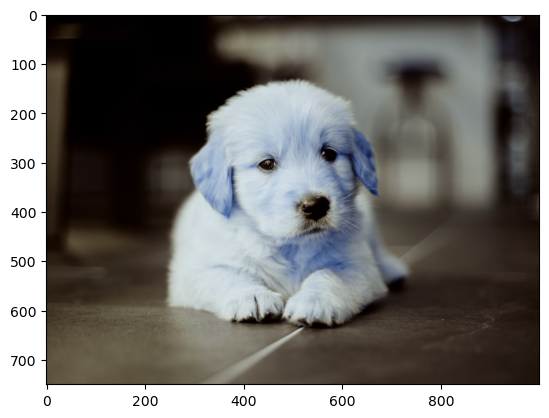

In [30]:
model_output("demo1.jpeg")

1/1 [==============================] - 0s 25ms/step
Probability 0.8138211
its a dog


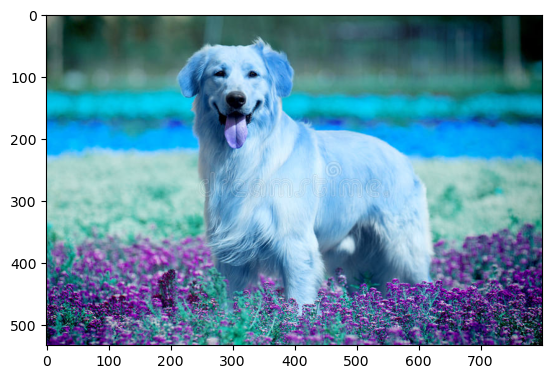

In [31]:
model_output("demo2.jpg")

1/1 [==============================] - 0s 23ms/step
Probability 0.18767238
its a cat


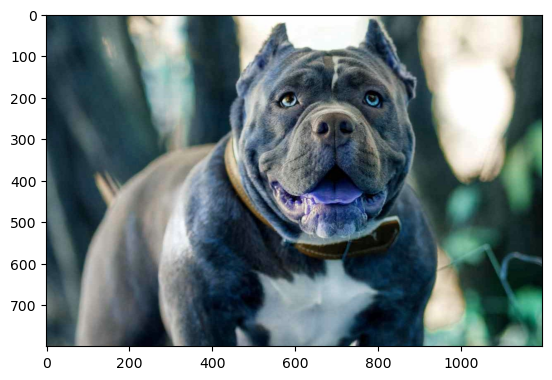

In [32]:
model_output("demo3.jpg")

1/1 [==============================] - 0s 34ms/step
Probability 0.54531735
its a dog


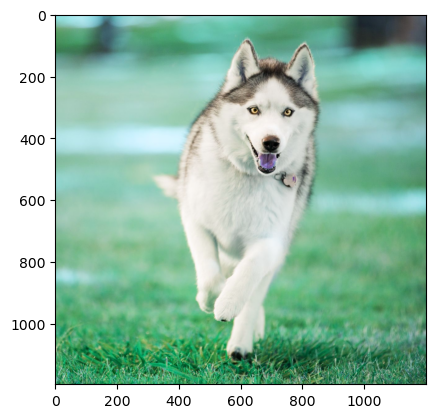

In [33]:
model_output("demo4.jpg")

1/1 [==============================] - 0s 25ms/step
Probability 0.21251373
its a cat


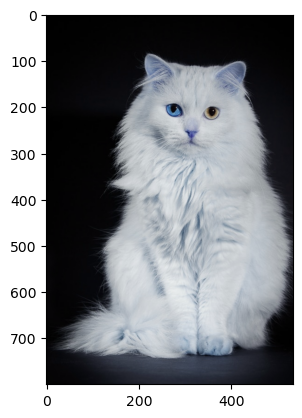

In [34]:
model_output("demo9.jpg")

1/1 [==============================] - 0s 28ms/step
Probability 0.7584932
its a dog


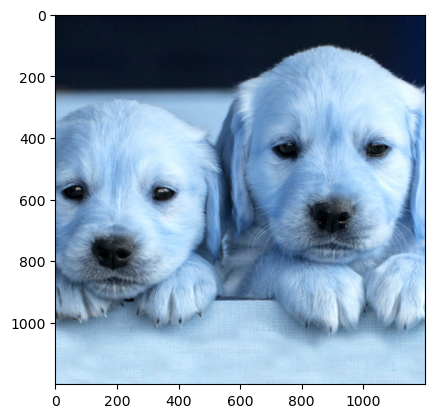

In [35]:
model_output("demo7.jpg")

1/1 [==============================] - 0s 25ms/step
Probability 0.111879304
its a cat


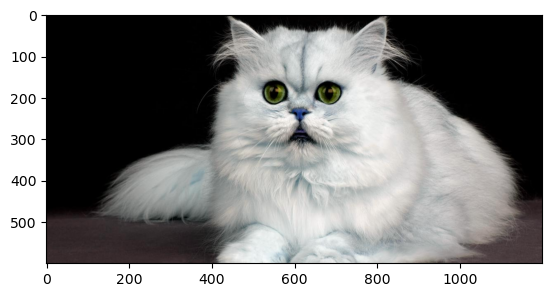

In [36]:
model_output("demo8.jpg")

# Finish